In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [4]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


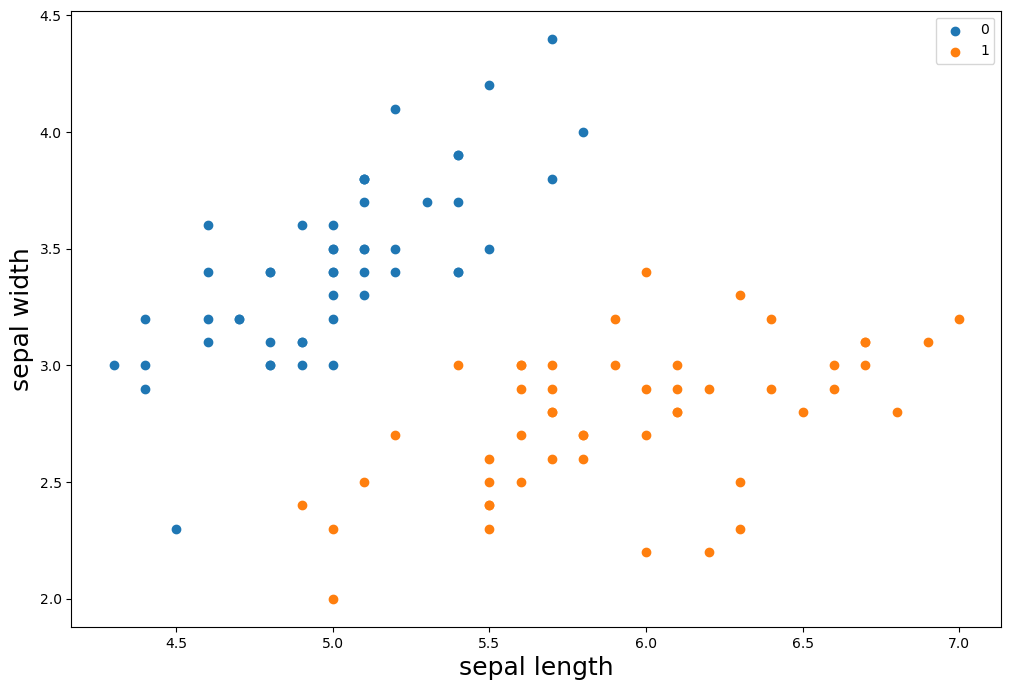

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length', fontsize=18)
plt.ylabel('sepal width', fontsize=18)
plt.legend()
plt.show()

In [6]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
# 函数通过计算输入测试数据 X 与训练数据集 self.X_train 中每个样本的距离，
# 找出距离最近的前 self.n 个样本，将它们的类别标签与距离存储在 knn_list 列表中。
# 其中，函数采用欧式距离 np.linalg.norm(X - self.X_train[i], ord=self.p) 计算样本之间的距离，self.p 表示距离的度量方式，一般为 1 或 2。
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p) 
            knn_list.append((dist, self.y_train[i]))
#             print(dist)
#             print(knn_list)
# 函数遍历训练数据集中剩余的样本，并逐一计算它们与测试数据 X 的距离。
# 如果该样本与测试数据的距离比 knn_list 中最远的样本距离更近，则将其加入 knn_list，并删除原来最远的样本。
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

# 统计
# 函数从 knn_list 中获取每个样本的类别标签，并使用 Python 标准库中的 Counter 函数对标签进行计数。
# 最后，函数根据标签计数结果，选取出现次数最多的标签作为测试数据 X 的预测结果，并将其返回。
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
#         max_count = sorted(count_pairs, key=lambda x: x)[-1]
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count
#评估函数算准确率的在测试集里面测试一下正确率
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [7]:
data = np.array(df.iloc[:150, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
clf = KNN(X_train, y_train)

In [9]:
clf.score(X_test, y_test)

0.7111111111111111

In [10]:
test_point = [6, 3]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 2.0


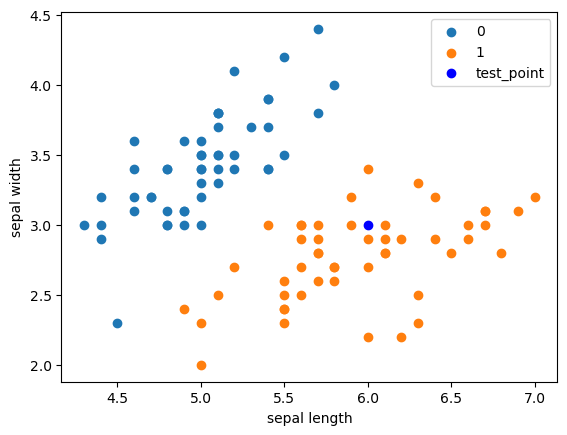

In [11]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [12]:
#sklearn
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
clf_sk.score(X_test, y_test)

0.6888888888888889

In [15]:
clf_sk = KNeighborsClassifier(n_neighbors=4)
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.7777777777777778

In [16]:
clf_sk = KNeighborsClassifier(n_neighbors=5)
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.6888888888888889

In [17]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 6
best_score = 0.8


In [18]:
#KD树的构造
from collections import namedtuple
from pprint import pformat

class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))

In [19]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


class KdTreeCreate(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点

# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [20]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")


def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

In [21]:
from time import process_time
from random import random


# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]


# 产生n个k维随机向量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [22]:
N = 400000
t0 = process_time()
kd2 = KdTreeCreate(random_points(3, N))  # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1, 0.5, 0.8])  # 四十万个样本点中寻找离目标最近的点
t1 = process_time()
print("time: ", t1 - t0, "s")
print(ret2)

time:  3.765625 s
Result_tuple(nearest_point=[0.10320101689040762, 0.49719803476428026, 0.7965070174631698], nearest_dist=0.005504402357882104, nodes_visited=55)


In [76]:
#KD树的绘图代码
from operator import itemgetter

def kdtree(point_list, depth=0):
    if len(point_list) == 0:
        return None
    
    # 选择“基于深度的轴”，以便轴在所有有效值之间循环
    # 只支持二维
    axis = depth % 2

    # Sort point list and choose median as pivot element
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2  # 选择中值点
    
    # 创建节点并构造子树
    return Node(
        location = point_list[median],
        left_child = kdtree(point_list[:median], depth + 1),
        right_child = kdtree(point_list[median + 1:], depth + 1)
    )

In [77]:
import matplotlib.pyplot as plt

# KD树的线宽
line_width = [4., 3.5, 3., 2.5, 2., 1.5, 1., .5, 0.3]


def plot_tree(tree, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    """ plot K-D tree
    :param tree      input tree to be plotted
    :param min_x
    :param max_x
    :param min_y
    :param max_y
    :param prev_node parent's node
    :param branch    True if left, False if right
    :param depth     tree's depth
    :return tree     node
    """

    cur_node = tree.location  # 当前树节点
    left_branch = tree.left_child  # 左分支
    right_branch = tree.right_child  # 右分支

    #根据树的深度设置线条的宽度
    if depth > len(line_width) - 1:
        ln_width = line_width[len(line_width) - 1]
    else:
        ln_width = line_width[depth]

    k = len(cur_node)
    axis = depth % k

    # 画垂直分割线
    if axis == 0:
        if branch is not None and prev_node is not None:
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]

        plt.plot([cur_node[0], cur_node[0]], [min_y, max_y],
                 linestyle='-',
                 color='red',
                 linewidth=ln_width)

    # 画水平分割线
    elif axis == 1:
        if branch is not None and prev_node is not None:
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]

        plt.plot([min_x, max_x], [cur_node[1], cur_node[1]],
                 linestyle='-',
                 color='blue',
                 linewidth=ln_width)

    # 画当前节点
    plt.plot(cur_node[0], cur_node[1], 'ko')

    # 绘制当前节点的左分支和右分支
    if left_branch is not None:
        plot_tree(left_branch, min_x, max_x, min_y, max_y, cur_node, True,
                  depth + 1)

    if right_branch is not None:
        plot_tree(right_branch, min_x, max_x, min_y, max_y, cur_node, False,
                  depth + 1)

In [78]:
def create_diagram(tree, width, height, min_val, max_val, delta):
    plt.figure("Kd Tree", figsize=(width, height))
#     plt.axis(
#         [min_val - delta, max_val + delta, min_val - delta, max_val + delta])
    plt.axis([int(min_val - delta), int(max_val + delta), int(min_val - delta), int(max_val + delta)])
#     plt.grid(b=True, which='major', color='0.75', linestyle='--')
    plt.grid(b=True, which='major', color='0.75', linestyle='--')
#     plt.grid(b=True, which='both', color='0.75', linestyle='--')
    plt.xticks([i for i in range(min_val - delta, max_val + delta, 1)])
    plt.yticks([i for i in range(min_val - delta, max_val + delta, 1)])


    # 画出树
    plot_tree(tree, min_val - delta, max_val + delta, min_val - delta,
              max_val + delta, None, None)
    plt.title('KD Tree')

In [79]:
def label_nodes(node, i):
    loc = node.location

    plt.text(loc[0] + 0.15, loc[1] + 0.15, str(i), fontsize=10)

    if node.left_child:
        i = label_nodes(node.left_child, i + 1)

    if node.right_child:
        i = label_nodes(node.right_child, i + 1)

    return i

In [80]:
def draw_target(point, radius):
    plt.plot(point[0], point[1], marker='o', color='#ff007f')
    circle = plt.Circle(point,
                        0.3,
                        facecolor='#ff007f',
                        edgecolor='#ff007f',
                        alpha=0.5)
    plt.gca().add_patch(circle)

    # 围绕目标点绘制超球体
    circle = plt.Circle(point,
                        radius,
                        facecolor='#ffd83d',
                        edgecolor='#ffd83d',
                        alpha=0.5)
    plt.gca().add_patch(circle)

In [81]:
def draw_neighbors(point_list):
    for point in point_list:
        # 画出找到的最近的邻居
        plt.plot(point[0], point[1], 'go')
        circle = plt.Circle(point,
                            0.3,
                            facecolor='#33cc00',
                            edgecolor='#33cc00',
                            alpha=0.5)
        plt.gca().add_patch(circle)

In [82]:
from graphviz import Digraph


def add_node(dot, node, parent_id=None, i=0, edge_label=''):
    loc = node.location
    node_id = str(i)
    dot.node(node_id, f"{i}\n({loc[0]},{loc[1]})")
    if parent_id:
        dot.edge(parent_id, node_id, label=edge_label)
    if node.left_child:
        i = add_node(dot, node.left_child, node_id, i + 1, 'l')
    if node.right_child:
        i = add_node(dot, node.right_child, node_id, i + 1, 'r')
    return i


def create_graph(tree):
    dot = Digraph(comment='Kd-tree')
    dot.attr('node',
             fontsize='20',
             shape='circle',
             width='1',
             fixedsize='true')
    dot.attr('edge', arrowsize='0.7')
    add_node(dot, tree)
    return dot

((6, 4),
 ((4, 5), ((2, 3), None, None), ((5, 7), None, None)),
 ((9, 6), ((7, 2), None, None), None))


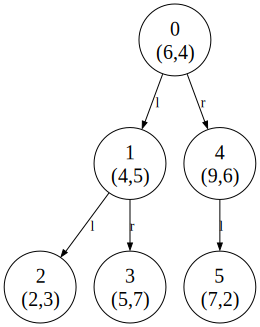

In [83]:
# point_list = [[2,3],[5,7],[9,6],[4,5],[6,4],[7,2]]
point_list1 = [(2,3),(5,7),(9,6),(4,5),(6,4),(7,2)]
tree = kdtree(point_list1)
print(tree)
create_graph(tree)

In [84]:
max_int = 10000000
min_int = -max_int - 1
max_float = float('inf')

In [85]:
def get_val_range(point_list):
    min_val = max_int
    max_val = -max_int - 1
    for point in point_list:
        min_v = min(point)
        if min_v < min_val:
            min_val = min_v
        max_v = max(point)
        if max_v > max_val:
            max_val = max_v
    return (min_val, max_val)

In [86]:
min_val, max_val=get_val_range(point_list1)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

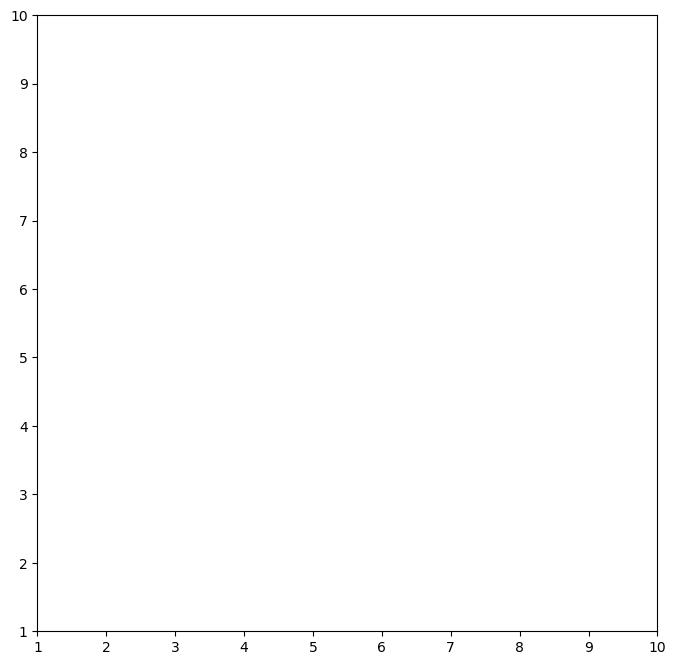

In [75]:
create_diagram(tree, 8., 8., min_val, max_val, 1)
label_nodes(tree, 0)
plt.show()